# Assessment2 - Linear Regression



In [1]:
# The library
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression as lr
import numpy as np
import ipywidgets as wg

## Load the Data
I will build a linear regression models of GDP as a function of
population:
* Population `population-and-demography.csv`
* GDP `national-gdp-penn-world-table.csv`

In [2]:
# Load our data
population = pd.read_csv("population-and-demography.csv")
gdp = pd.read_csv("national-gdp-penn-world-table.csv")

## Join the Data
Using line regression I will investigate three possible relationships between population
and gdp:
* A linear relationship
* A quadratic relationship
* A log-linear relationship

Merge population with gdp using an outer join which will creat a new data-frame with one record per nation per year with both
population and gdp.

In [3]:
NationAnnual = pd.merge(
    left = population,
    right = gdp,
    how = "outer",
    left_on = ["Year", "Country name"],
    right_on = ["Year", "Entity"]
)

Create new columns for Population squared, and the log-linear function of population.

In [4]:
# Creating new columns
NationAnnual['population_squared'] = NationAnnual['Population'].values ** 2
NationAnnual['log_linear_population'] = np.log(NationAnnual['Population'].values)

### Create a new data-frame that has been filtered to contain only valid data.
* Nation from the GDP data must be valid and not null.
* Nation from the Population data must be valid and not null.
* Population must be not null.
* GDP must be not null.
* Year is 2010 

Initially, we will analyze a single year of data. We need the following columns:
* GDP
* Population
* Year
* Country name

In [5]:
year = 2010
Nation2010 = NationAnnual[
    (NationAnnual["Year"] == year) & 
    (pd.notnull(NationAnnual["Entity"])) &
    (pd.notnull(NationAnnual["Country name"])) &
    (pd.notnull(NationAnnual["Population"])) &
    (pd.notnull(NationAnnual["GDP (output, multiple price benchmarks)"]))
    
][
    [
        "Country name",
        "Population",
        "GDP (output, multiple price benchmarks)"
    ]
]

## Fit the Linear Model
We are using the Linear Regression object that we aliased as `lr` during the import. 
Our first linear regression investigates GDP as a function of population.
$$
\operatorname{\mathbb{E}}[\text{GDP}] = a \times \text{Population} + b
$$
In this model, the slope $a$ is the amount of GDP produced by each
person, while the intercept $b$ is a baseline GDP for a nation with no population.

In [6]:
# Assign the result of fitting to the estimate2010 variable
linear2010 = lr().fit(
    X = Nation2010["Population"].values.reshape(-1, 1),
    y = Nation2010["GDP (output, multiple price benchmarks)"].values
)

# Take a look at the output
print(f"Intercept: {linear2010.intercept_}")
print(f"Coefficient: {linear2010.coef_[0]}")

Intercept: 201957342238.6109
Coefficient: 8966.323451567921


## Plot the Linear Fit
On X-axis plot population, on the y-axis plot GDP then add the linear model.

We are using the imported plotting library aliased as `mp`.

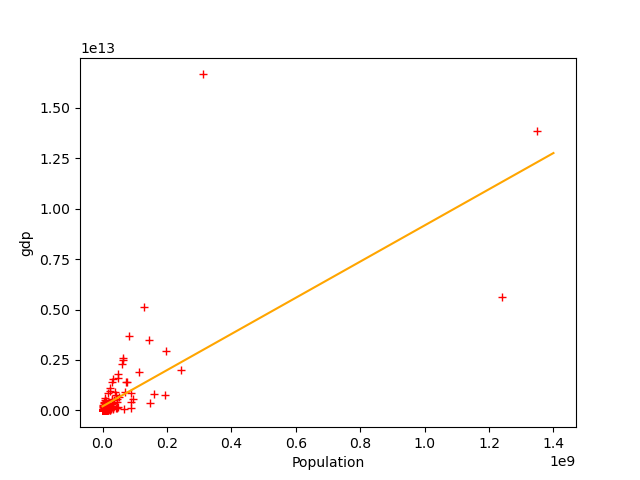

In [7]:
# Blank canvas
linearfg, linearax = mp.subplots()

# Label the axes
linearax.set_xlabel("Population")
linearax.set_ylabel("gdp")

# The actual data. There is one point per nation.
linearactual, = linearax.plot(
    Nation2010["Population"],
    Nation2010["GDP (output, multiple price benchmarks)"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = np.linspace(10**3, 1.4 * 10**9, 100)
linearexpect, = linearax.plot(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Fit the Quadratic Model

Our next linear regression investigates GDP as a function of the square of the
population.
$$
\operatorname{\mathbb{E}}[\text{GDP}] = a \times \text{Population}^2 + b
$$

In this model the Linear Regression slope $a$  can be interpreted as the amount of GDP due to every possible transaction between two people, and the intercept  $b$ is a baseline GDP of an unpopulated nation.

In [8]:
# Assign the result of fitting to the estimate2010 variable
quadratic2010 = lr().fit(
    X = (Nation2010["Population"].values**2).reshape(-1, 1),
    y = Nation2010["GDP (output, multiple price benchmarks)"].values
)

# Take a look at the output
print(f"Intercept: {quadratic2010.intercept_}")
print(f"Coefficient: {quadratic2010.coef_[0]}")

Intercept: 415196591987.9513
Coefficient: 6.0510424627443855e-06


## Plot the Quadratic Fit
We include the quadratic model on a plot with the linear model.

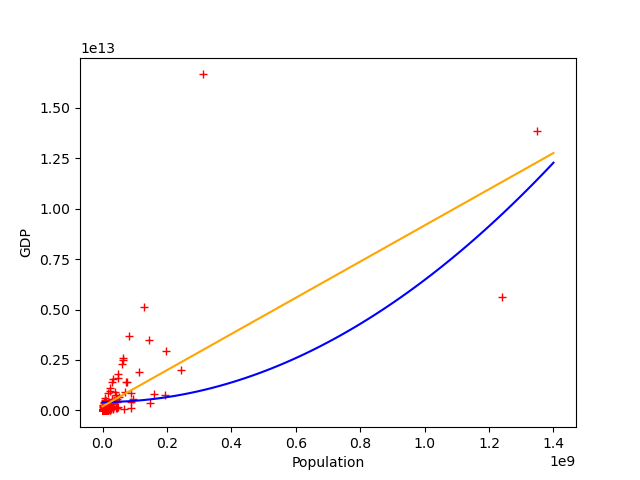

In [9]:
# Blank canvas
quadraticfg, quadraticax = mp.subplots()

# Label the axes
quadraticax.set_xlabel("Population")
quadraticax.set_ylabel("GDP")

# The actual data. There is one point per nation.
quadraticactual, = quadraticax.plot(
    Nation2010["Population"],
    Nation2010["GDP (output, multiple price benchmarks)"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = np.linspace(10**3, 1.4 * 10**9, 100)
quadraticexpect, = quadraticax.plot(
    xticks,
    quadratic2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
quadraticax.plot(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Fit the Log-Linear Model
Our final linear regression investigates GDP as a function of the log-linear of the
population.
$$
\operatorname{\mathbb{E}}[\text{GDP}] = a \times \text{Population} \times \log(\text{Population}) + b
$$

In this model the Linear Regression slope $a$ can be interpreted as the amount of GDP due to the degrees of separation between a consumer and producer, and the intercept $b$ as a baseline GDP of an unpopulated nation.

In [10]:
# Assign the result of fitting to the estimate2010 variable
loglinear2010 = lr().fit(
    X = (Nation2010["Population"].values*np.log(Nation2010["Population"].values)).reshape(-1, 1),
    y = Nation2010["GDP (output, multiple price benchmarks)"].values
)

# Take a look at the output
print(f"Intercept: {loglinear2010.intercept_}")
print(f"Coefficient: {loglinear2010.coef_[0]}")

Intercept: 234385211032.82257
Coefficient: 424.77612152500507


## Plot the Log-Linear Fit
Finally we include the log-linear model with the plot of the quadratic and linear model.

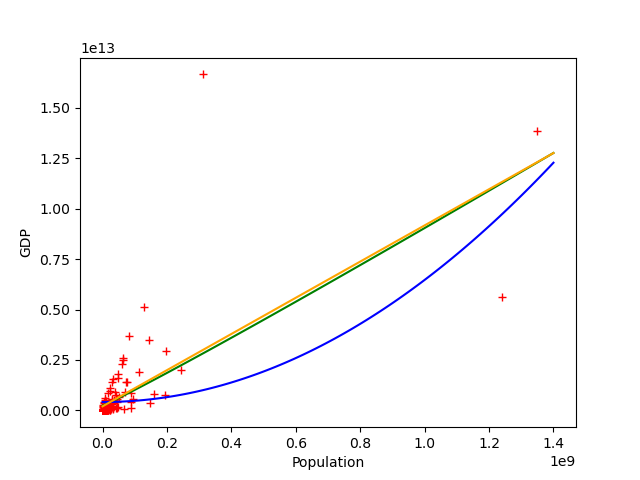

In [11]:
# Blank canvas
loglinearfg, loglinearax = mp.subplots()

# Label the axes
loglinearax.set_xlabel("Population")
loglinearax.set_ylabel("GDP")

# The actual data. There is one point per nation.
loglinearactual, = loglinearax.plot(
    Nation2010["Population"],
    Nation2010["GDP (output, multiple price benchmarks)"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = np.linspace(10**3, 1.4*10**9, 100)
loglinearexpect, = loglinearax.plot(
    xticks,
    loglinear2010.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglinearax.plot(
    xticks,
    quadratic2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglinearax.plot(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Qualitative Diagnostics
Most nations have population smaller than 100 million, which means we cannot visually assess
how well the models estimate GDP using linear axes. We redraw our plot using a
log-log scale on the axes.


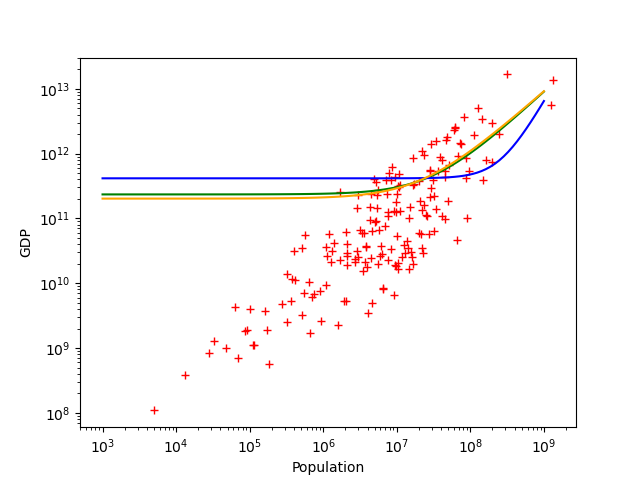

In [12]:
# Blank canvas
loglogfg, loglogax = mp.subplots()

# Label the axes
loglogax.set_xlabel("Population")
loglogax.set_ylabel("GDP")

# The actual data. There is one point per nation.
loglogactual, = loglogax.loglog(
    Nation2010["Population"],
    Nation2010["GDP (output, multiple price benchmarks)"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = 10**np.linspace(3, 9, 100)
loglogexpect, = loglogax.loglog(
    xticks,
    loglinear2010.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglogax.loglog(
    xticks,
    quadratic2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglogax.loglog(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

This is the non zero intercept or value is faulty because it is over estimating for nations with less than 10 million people. this model does not work. Thus, we have to revise our hypothesis.

## Hypothesis Revision
From the log-log we can see that all the models fail for nations with less than 100 million
people. The reason for this failure is our faulty assumption that the intercept $b$ is not
zero. This is physically unrealistic as a nation with no people should have no GPP. In
fact, in the log-linear model, a nation with only one person would have no GDP.

Lets rerun the models, asserting that the intercept is zero, and that all the data points
are positive.

In [13]:
# Assign the result of fitting to the estimate2010 variable
linearrevised2010 = lr(
    fit_intercept = False, # force interecept to be zero
    positive = True   # assume all the data is posoitive
).fit(
    X = Nation2010["Population"].values.reshape(-1, 1),
    y = Nation2010["GDP (output, multiple price benchmarks)"].values
)

# Take a look at the output
print("Linear in Population")
print("--------------------")
print(f"Intercept: {linearrevised2010.intercept_}")
print(f"Coefficient: {linearrevised2010.coef_[0]}")
print()

# Assign the result of fitting to the estimate2010 variable
quadraticrevised2010 = lr(
    fit_intercept = False,  # force interecept to be zero
    positive = True
).fit(
    X = (Nation2010["Population"].values**2).reshape(-1, 1),
    y = Nation2010["GDP (output, multiple price benchmarks)"].values
)

# Take a look at the output
print("Quadratic in Population")
print("-----------------------")
print(f"Intercept: {quadraticrevised2010.intercept_}")
print(f"Coefficient: {quadraticrevised2010.coef_[0]}")
print()

# Assign the result of fitting to the estimate2010 variable
loglinearrevised2010 = lr(
    fit_intercept = False,  # force interecept to be zero
    positive = True
).fit(
    X = (Nation2010["Population"].values*np.log(Nation2010["Population"].values)).reshape(-1, 1),
    y = Nation2010["GDP (output, multiple price benchmarks)"].values
)

# Take a look at the output
print("Log-Linear in Population")
print("------------------------")
print(f"Intercept: {loglinearrevised2010.intercept_}")
print(f"Coefficient: {loglinearrevised2010.coef_[0]}") #emissions in steps in supply chain

Linear in Population
--------------------
Intercept: 0.0
Coefficient: 9331.284315409732

Quadratic in Population
-----------------------
Intercept: 0.0
Coefficient: 6.328408078498671e-06

Log-Linear in Population
------------------------
Intercept: 0.0
Coefficient: 443.5736360564349


## Rerun Diagnostics
Inspecting the coefficients of each model we can observe for each model:
* The linear model estimates that each person produce $\approx 9331$ $ of GDP
per year
* The log-linear model estimates that each degree of separation between a producer and
consumer generates $\approx 443 \times \log(100) = 886$  of GDP per year,
where we are assuming each person knows on average $100$ people.
* The quadratic model estimates that each potential connection between two people
generates $\approx 6.3$ $ of GDP per year. 

When we log-log plot the models we can see that both the linear and the log-linear models
estimate well for both large and small populations, while the quadratic model is clearly a
poor estimator.

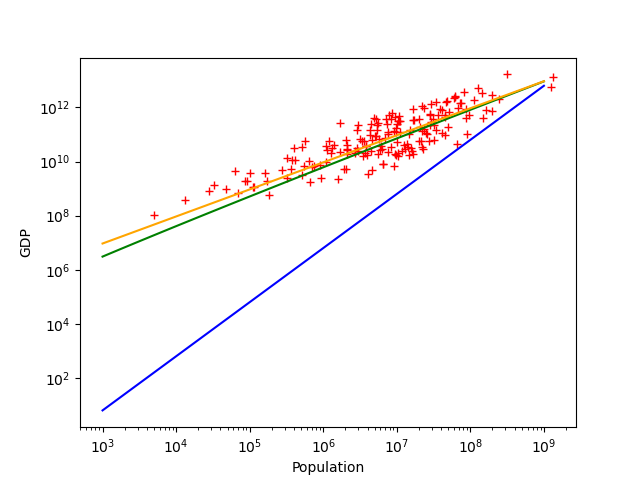

In [14]:
# Blank canvas
revisedfg, revisedax = mp.subplots()

# Label the axes
revisedax.set_xlabel("Population")
revisedax.set_ylabel("GDP")

# The actual data. There is one point per nation.
revisedactual, = revisedax.loglog(
    Nation2010["Population"],
    Nation2010["GDP (output, multiple price benchmarks)"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = 10**np.linspace(3, 9, 100)
revisedexpect, = revisedax.loglog(
    xticks,
    loglinearrevised2010.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
revisedax.loglog(
    xticks,
    quadraticrevised2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
revisedax.loglog(
    xticks,
    linearrevised2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Quantitative Diagnostics
To quantitatively compare the models we can use a statistical method called the Likelihood
Ratio Test. 

Finally we will animate all the years from 1950 to 2021

interactive(children=(IntSlider(value=1950, description='year', max=2021, min=1950), Output()), _dom_classes=(…

<function __main__.redraw(year=1950)>

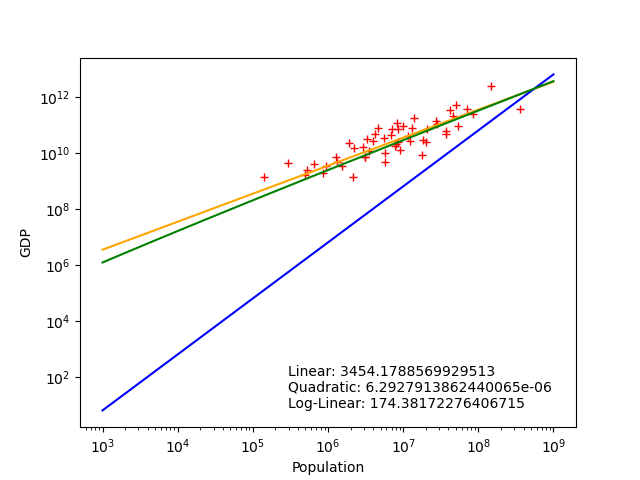

In [15]:
# Select the required data
NationAnimate = NationAnnual[
    (NationAnnual["Year"] >= 1950) &
    (NationAnnual["Year"] <= 2021) & 
    (pd.notnull(NationAnnual["Entity"])) &
    (pd.notnull(NationAnnual["Country name"])) &
    (pd.notnull(NationAnnual["Population"])) &
    (pd.notnull(NationAnnual["GDP (output, multiple price benchmarks)"]))
    
][
    [
        "Country name",
        "Year",
        "Population",
        "GDP (output, multiple price benchmarks)"
    ]
]

# Blank canvas
animatefg, animateax = mp.subplots()

# Label the axes
animateax.set_xlabel("Population")
animateax.set_ylabel("GDP")

# First pass data
Nation1950 = NationAnimate[NationAnimate["Year"] == 1950]

# Evaluation points
xticks = 10**np.linspace(3, 9, 100)

# The actual data. There is one point per nation.
actualanimate, = animateax.loglog(
    Nation1950["Population"],
    Nation1950["GDP (output, multiple price benchmarks)"],
    "+r"
)

# Linear model
linearexpected = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = Nation1950["Population"].values.reshape(-1, 1),
    y = Nation1950["GDP (output, multiple price benchmarks)"].values
)

# Linear plot here animate will update data
linearanimate, = animateax.loglog(
    xticks,
    linearexpected.predict(xticks.reshape(-1, 1)),
    "orange"
)

# Quadratic model
quadraticexpected = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = (Nation1950["Population"].values**2).reshape(-1, 1),
    y = Nation1950["GDP (output, multiple price benchmarks)"].values
)

# Quadratic plot
quadraticanimate, = animateax.loglog(
    xticks,
    quadraticexpected.predict((xticks**2).reshape(-1, 1)),
    "blue"
)

# Log-linear model
loglinearexpected = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = (Nation1950["Population"].values*np.log(Nation1950["Population"].values)).reshape(-1, 1),
    y = Nation1950["GDP (output, multiple price benchmarks)"].values
)

# Log-linear plot
loglinearanimate, = animateax.loglog(
    xticks,
    loglinearexpected.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)

# Estimated coefficients
coefficients = animatefg.text(
    0.45,
    0.15,
    f"Linear: {linearexpected.coef_[0]}\nQuadratic: {quadraticexpected.coef_[0]}\nLog-Linear: {loglinearexpected.coef_[0]}"
)

# Animate the figure
def redraw(year = 1950):
    NationYear = NationAnimate[NationAnimate["Year"] == year]

    # Actual data
    actualanimate.set_data(
        NationYear["Population"],
        NationYear["GDP (output, multiple price benchmarks)"]
    )

    # Linear model
    linearexpected.fit(
        X = NationYear["Population"].values.reshape(-1, 1),
        y = NationYear["GDP (output, multiple price benchmarks)"].values
    )

    # Linear plot
    linearanimate.set_data(
        xticks,
        linearexpected.predict(xticks.reshape(-1, 1))
    )

    # Quadratic model
    quadraticexpected.fit(
        X = (NationYear["Population"].values**2).reshape(-1, 1),
        y = NationYear["GDP (output, multiple price benchmarks)"].values
    )

    # Quadratic plot
    quadraticanimate.set_data(
        xticks,
        quadraticexpected.predict((xticks**2).reshape(-1, 1))
    )

    # Log-linear model
    loglinearexpected.fit(
        X = (NationYear["Population"].values*np.log(NationYear["Population"].values)).reshape(-1, 1),
        y = NationYear["GDP (output, multiple price benchmarks)"].values
    )

    # Log-linear plot
    loglinearanimate.set_data(
        xticks,
        loglinearexpected.predict((xticks*np.log(xticks)).reshape(-1, 1))
    )

    # Update coefficients
    coefficients.set_text(
        f"Linear: {linearexpected.coef_[0]}\nQuadratic: {quadraticexpected.coef_[0]}\nLog-Linear: {loglinearexpected.coef_[0]}"
    )

    # Update the figure is each year of data
    animatefg.canvas.draw_idle()

# Illustrate the results year to year from 1950 to 2021 by steps of 1
wg.interact(redraw, year = (1950, 2021, 1))

## Summary
All of the models have consistent fits year over year. Regardless of the model, the
estimated coefficient of the slope, fixing the intercept at zero, increases year over year
corresponding to the well documented GDP intensification of society through the spread
of industrialization.
Here, we can see that both the linear and the log-linear models
estimate well for small populations, while the quadratic model is clearly a
poor estimator.
Including the intercept often provides a better fit for a broader range of data as it allows the model to capture the baseline relationship between the variables when all predictors are zero. Excluding the intercept may fit the specific data points better but might not generalize well to new data or different contexts.